In [ ]:
#Kiflan Qaedy Laksono_13119320

# Dekripsi: ini adalah program untuk meprediksi harga dari saham GOOG

#Menggunakan Machine Learning yang bernama SVR (Support Vector Rergression)     

In [ ]:
#Import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

Mengimport packages atau libraries untuk memudahkan menulis program

In [ ]:
#Load the data
#from google.colab import files # Use to load data on Google Colab
#uploaded = files.upload() # Use to load data on Google Colab
df = pd.read_csv('GOOG_30_days.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-03,2402.719971,2419.699951,2384.500000,2395.169922,2395.169922,1689400
1,2021-05-04,2369.739990,2379.260010,2311.699951,2354.250000,2354.250000,1756000
2,2021-05-05,2368.419922,2382.199951,2351.409912,2356.739990,2356.739990,1090300
3,2021-05-06,2350.639893,2382.709961,2342.337891,2381.350098,2381.350098,1030900
4,2021-05-07,2400.000000,2416.409912,2390.000000,2398.689941,2398.689941,1163600
5,2021-05-10,2374.889893,2378.000000,2334.729980,2341.659912,2341.659912,1300300
6,2021-05-11,2291.860107,2322.000000,2283.000000,2308.760010,2308.760010,1605500
7,2021-05-12,2261.709961,2285.370117,2230.050049,2239.080078,2239.080078,1746700
8,2021-05-13,2261.090088,2276.601074,2242.719971,2261.969971,2261.969971,1333500
9,2021-05-14,2291.830078,2321.139893,2283.320068,2316.159912,2316.159912,1331200


kemudian mengimport data saham google (GOOG) dari finance.yahoo.com


In [ ]:
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
19,2021-05-28,2421.959961,2428.139893,2407.689941,2411.560059,2411.560059,1205400


hasil print baris terakhir dari data

In [ ]:
#Create the lists / X and y data set
days = list()
adj_close_prices = list()

Buat variabel yang akan digunakan sebagai kumpulan data independen dan dependen dengan menyetelnya sama dengan daftar kosong.

In [ ]:
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

Dapatkan semua baris dari kolom Tanggal simpan ke dalam variabel yang disebut 'df_days' dan dapatkan semua baris dari kolom Harga Tutup Penyesuaian dan simpan datanya ke dalam variabel.

In [ ]:
#Create the independent data set
for day in df_days:
   days.append( [int(day.split('-')[2])] )
#Create the dependent data set
for adj_close_price in df_adj_close:
   adj_close_prices.append( float(adj_close_price) )

Buat kumpulan data independen 'X' dan simpan data dalam variabel 'hari'.
Buat kumpulan data dependen 'y' dan simpan data dalam variabel 'adj_close_prices'. Keduanya dapat dilakukan dengan menambahkan data ke masing-masing daftar.

In [ ]:
print(days)

[[3], [4], [5], [6], [7], [10], [11], [12], [13], [14], [17], [18], [19], [20], [21], [24], [25], [26], [27], [28]]


In [ ]:
#Create and train an SVR model using a linear kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days,adj_close_prices)#Create and train an SVR model using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)#Create and train an SVR model using a RBF kernel
rbf_svr = SVR(kernel='rbf', C=2500.0, gamma=0.35)
rbf_svr.fit(days, adj_close_prices)

SVR(C=2500.0, gamma=0.35)

Selanjutnya, saya akan membuat dan melatih 3 model Support Vector Regression (SVR) yang berbeda dengan tiga kernel berbeda untuk melihat mana yang berkinerja terbaik.

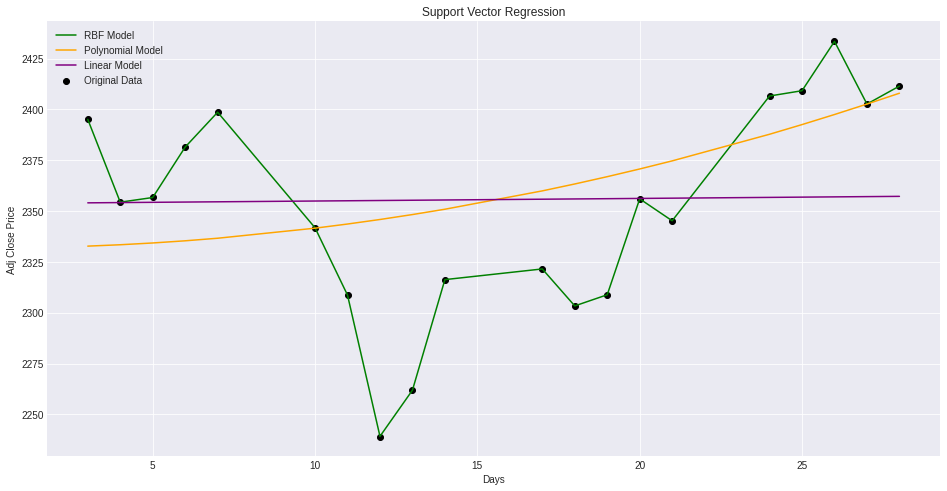

In [ ]:
#Plot the models on a graph to see which has the best fit
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'purple', label='Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

memplot model pada grafik untuk melihat mana yang paling cocok dan mengembalikan prediksi hari itu.

Model terbaik dari grafik di atas
 ini tampaknya adalah RBF yang merupakan model Regresi Vektor Pendukung yang menggunakan kernel yang disebut fungsi basis radial. Namun grafik ini bisa menyesatkan.

In [ ]:
day = [[30]]
print('The RBF SVR predicted:', rbf_svr.predict(day))
print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))

The RBF SVR predicted: [2421.34023577]
The Linear SVR predicted: [2357.465143]
The Polynomial SVR predicted: [2419.19780919]
